In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_generator= ImageDataGenerator(rescale=1/225)

In [4]:
img_size=64
batch=32

In [29]:
train_path= "Training"
test_path= "Testing"

In [25]:
train= data_generator.flow_from_directory( train_path,
    target_size=(img_size, img_size),
    batch_size=batch,shuffle=True)

Found 2736 images belonging to 5 classes.


In [26]:
train.num_classes

5

In [27]:
train.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [30]:
test= data_generator.flow_from_directory(test_path, target_size=(img_size, img_size), shuffle=True , batch_size=batch)

Found 934 images belonging to 5 classes.


In [57]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD

In [52]:
model= Sequential()
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

'''model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))'''

'model = Sequential()\nmodel.add(Flatten())\nmodel.add(Dense(128, activation="relu"))\nmodel.add(Dense(10, activation="softmax"))'

In [58]:
inp=Input(shape=(img_size,img_size, 3))

x=Flatten()(inp)
x=Dense(64, activation='relu')(x)

out= Dense(5, activation='softmax')(x)

model= Model(inp,out)

In [59]:
model.compile(optimizer=SGD(),
    loss="categorical_crossentropy",
    metrics=['accuracy'])

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                786496    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 786,821
Trainable params: 786,821
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(train, validation_data=test, epochs=5)

Epoch 1/5
86/86 [==============================] - 19s 216ms/step - loss: 1.5362 - accuracy: 0.3143 - val_loss: 1.4609 - val_accuracy: 0.3351
Epoch 2/5
86/86 [==============================] - 18s 207ms/step - loss: 1.3441 - accuracy: 0.4207 - val_loss: 1.3612 - val_accuracy: 0.4079
Epoch 3/5
86/86 [==============================] - 18s 209ms/step - loss: 1.2596 - accuracy: 0.4605 - val_loss: 1.3551 - val_accuracy: 0.4058
Epoch 4/5
86/86 [==============================] - 19s 220ms/step - loss: 1.2277 - accuracy: 0.4730 - val_loss: 1.3170 - val_accuracy: 0.4208
Epoch 5/5
86/86 [==============================] - 18s 209ms/step - loss: 1.1934 - accuracy: 0.4956 - val_loss: 1.5160 - val_accuracy: 0.3704


In [77]:
#Improve the model

from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout, GlobalMaxPool2D

In [79]:
inp=Input(shape=(img_size,img_size, 3))

x=Conv2D(128, 3, activation= 'relu', kernel_regularizer=L2())(inp)
x=MaxPool2D(2)(x)
x=Conv2D(128, 3, activation= 'relu')(x)
x=MaxPool2D(2)(x)

x= GlobalMaxPool2D()(x)
x=Dense(64, activation='relu')(x)
x= Dropout(0.1)(x)

out= Dense(5, activation='softmax')(x)

model1= Model(inp,out)

In [80]:
model1.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256

In [86]:
h=model1.fit(train, validation_data=test, epochs=5)

Epoch 1/5
86/86 [==============================] - 64s 740ms/step - loss: 0.8217 - accuracy: 0.7065 - val_loss: 0.8524 - val_accuracy: 0.6692
Epoch 2/5
86/86 [==============================] - 56s 655ms/step - loss: 0.7770 - accuracy: 0.7240 - val_loss: 0.8126 - val_accuracy: 0.6884
Epoch 3/5
86/86 [==============================] - 61s 705ms/step - loss: 0.7383 - accuracy: 0.7379 - val_loss: 0.8407 - val_accuracy: 0.6809
Epoch 4/5
86/86 [==============================] - 59s 680ms/step - loss: 0.7302 - accuracy: 0.7372 - val_loss: 0.8069 - val_accuracy: 0.7120
Epoch 5/5
86/86 [==============================] - 51s 593ms/step - loss: 0.7078 - accuracy: 0.7504 - val_loss: 0.8010 - val_accuracy: 0.7034


In [82]:
model1.save_weights('flower_wts.h5')

In [83]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

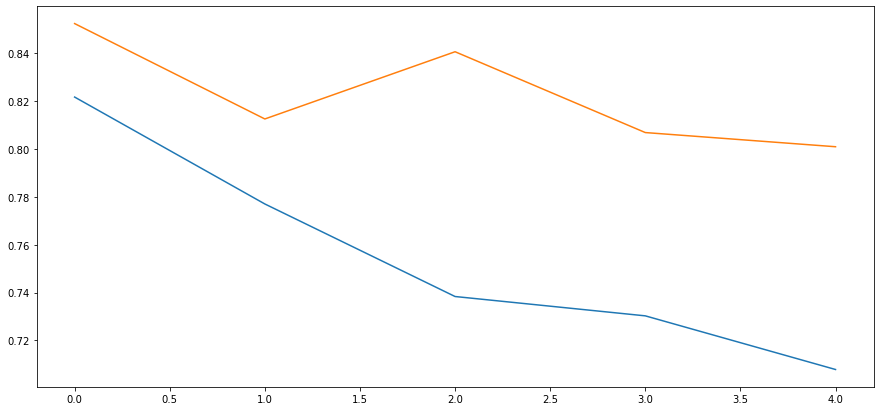

<function matplotlib.pyplot.show(*args, **kw)>

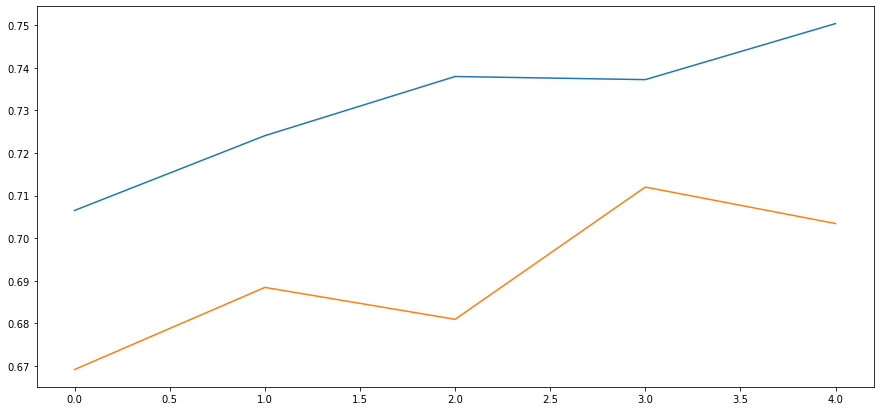

In [88]:
plt.rcParams['figure.figsize']=15,7
plt.plot(h.history['accuracy'], label=train)
plt.plot(h.history['val_accuracy'], label=test)

plt.show

In [89]:
model1.evaluate(test)

30/30 [==============================] - 6s 182ms/step - loss: 0.8010 - accuracy: 0.7034


[0.8009519577026367, 0.7034261226654053]

In [90]:
model_d= Model()

In [92]:
model_d.load_weights("flower_wts.h5")

ValueError: Unable to load weights saved in HDF5 format into a subclassed Model which has not created its variables yet. Call the Model first, then load the weights.

In [94]:
# predefined models

In [95]:
from tensorflow.keras.applications import ResNet101

In [96]:
resnet= ResNet101(include_top=False,
    weights='imagenet',
    input_shape=(32,32,3))

171458560/171446536 [==============================] - 23s 0us/step


In [97]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [98]:
for layers in resnet.layers:
    if ('Dense' not in layers.name):
        layers.trainable = False
    if ('Dense' in layers.name):
        layers.trainable = True
    

In [101]:
for layers in resnet.layers:
    print(layers.name, layers.trainable)

input_13 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_co

In [103]:
transfer=Sequential([
    resnet,
    GlobalMaxPool2D(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

In [104]:
transfer.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [105]:
transfer.fit(train, validation_data=test, epochs=2)

Epoch 1/2
86/86 [==============================] - 82s 879ms/step - loss: 1.5631 - accuracy: 0.3092 - val_loss: 1.4676 - val_accuracy: 0.3747
Epoch 2/2
86/86 [==============================] - 69s 805ms/step - loss: 1.4502 - accuracy: 0.3845 - val_loss: 1.4015 - val_accuracy: 0.4400
